# Data exploration and cleaning

In [233]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
from IPython.display import clear_output

In [4]:
test_data_og = np.load('../data/test-processed/test_x_l2a_processed.npy')
test_labels_og = np.load('../data/test-processed/test_y_l2a_processed.npy')
test_length = np.load('../data/test-processed/test_length_l2a_processed.npy')
train_data_og = np.load('../data/train-processed/data_x_l2a_processed.npy')
train_labels_og= np.load('../data/train-processed/data_y_l2a_processed.npy')
train_length = np.load('../data/train-processed/length_l2a_processed.npy')

In [5]:
# The X data channels are as below:
# [B02,B03,B04,B05,B06,B07, B08, B8A,B11,B12, SLOPE, EVI, MSAVI2, Bare soil index, Sentinel 1 VV, Sentinel 1 VH]

test_data_og.shape

(684, 24, 16, 16, 17)

## Exploratory visualization the different bands 

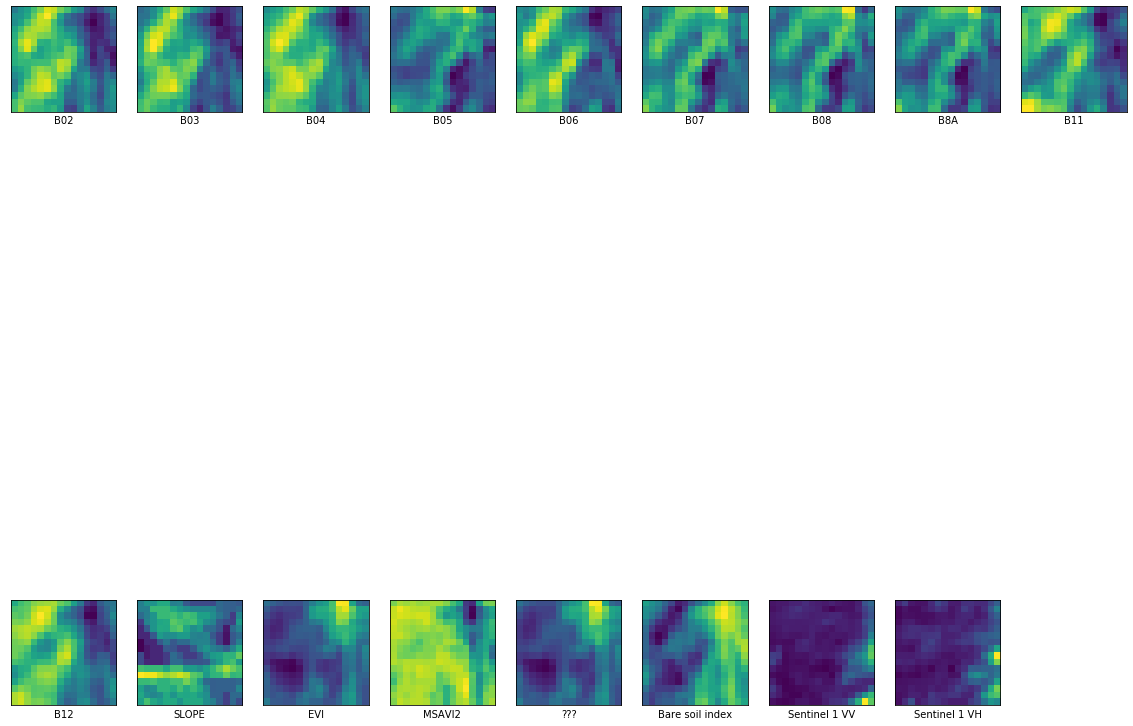

In [6]:
band_names = ['B02',"B03",'B04','B05','B06','B07', 'B08', 'B8A','B11','B12', 
              'SLOPE','EVI', 'MSAVI2',  '???', 'Bare soil index', 'Sentinel 1 VV', 'Sentinel 1 VH']

plt.figure(figsize=(20,20))
for i in range(17):
    plt.subplot(2,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data_og[0,0,:,:,i])
    plt.xlabel(band_names[i])
plt.show()

### Cleaning up the data

**Removing erroneous column 14**

In [8]:
# column 14 contains NaN-s
nan = np.isnan(test_data_og[:,:,:,:,14])

unique_elements, counts_elements = np.unique(nan, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[      0       1]
 [4201728     768]]


In [9]:
# removing column 14 as it has NaN-s
test_data2 = np.delete(test_data_og,14, axis = 4)
train_data2 = np.delete(train_data_og,14, axis = 4)

In [10]:
train_data2.shape

(4383, 24, 16, 16, 16)

In [11]:
nan = np.isnan(test_data2[:,:,:,:,14])

unique_elements, counts_elements = np.unique(nan, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[      0]
 [4202496]]


**Simplifying to a single time dimension**

In [388]:
train_data3 = train_data2[:,22,:,:,:]
train_data3.shape

(4383, 16, 16, 16)

In [389]:
test_data3 = test_data2[:,22,:,:,:]
test_data3.shape

(684, 16, 16, 16)

**Normalize data [x_norm = (x - min) / (max - min)]**

In [420]:
data = np.concatenate((train_data2, test_data2), axis = 0)

# calculating the minimums and the max-min by column 
minarray = np.min(data[:, :, :, :, :], axis = (0,1,2,3))
max_min_array = np.max(data[:, :, :, :, :], axis = (0,1,2,3)) - np.min(data[:, :, :, :, :], axis = (0,1,2,3))

train_data4 = (train_data2 - np.tile(minarray, 4383*24*16*16).reshape(4383,24,16,16,16)) / np.tile(max_min_array, 4383*24*16*16).reshape(4383,24,16,16,16)
test_data4 = (test_data2 - np.tile(minarray, 684*24*16*16).reshape(684,24,16,16,16)) / np.tile(max_min_array, 684*24*16*16).reshape(684,24,16,16,16)

In [421]:
# setting it to the original name
train_data = train_data4
test_data = test_data4

In [392]:
# Check if data is normalized
print("Min value of all variables is 0:", (np.min(train_data[:,:,:,:], axis=(0,1,2)) == 0).all())
print("Max value of all variables is 1:", (np.max(train_data[:,:,:,:], axis=(0,1,2)) == 1).all())

Min value of all variables is 0: False
Max value of all variables is 1: True


## Visualizing the data

In [396]:
plotnum = 189

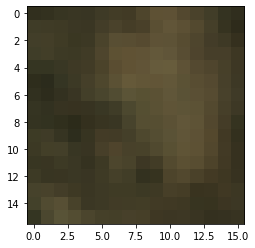

In [393]:
plt.imshow(np.flip(np.multiply(train_data[plotnum,:,:,0:3], 255).reshape(16,16,3).astype(int),2))

In [276]:
np.flip(train_data[0,0:2,0:2,0:3],2)

array([[[0.32777932, 0.25453398, 0.17008005],
        [0.32255295, 0.2537585 , 0.16998334]],

       [[0.32092366, 0.2566405 , 0.17556445],
        [0.33648875, 0.2697989 , 0.18253666]]], dtype=float32)

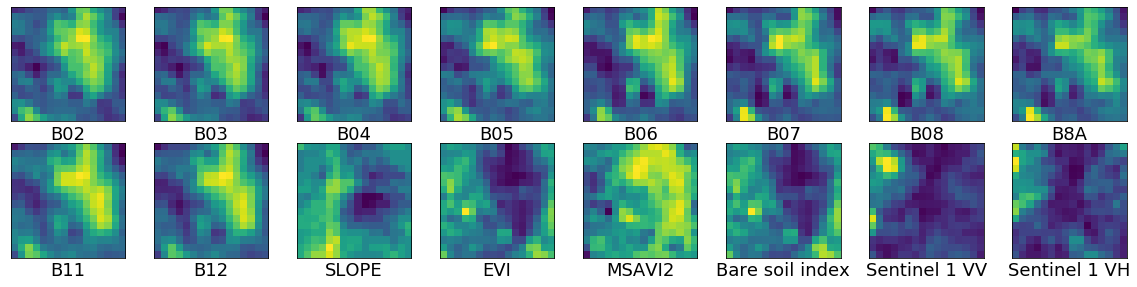

In [459]:
# Visualization at time 24 as chosen above
band_names = ['B02',"B03",'B04','B05','B06','B07', 'B08', 'B8A','B11','B12', 
              'SLOPE','EVI', 'MSAVI2', 'Bare soil index', 'Sentinel 1 VV', 'Sentinel 1 VH']

plt.figure(figsize=(20,20))
gs1 = gridspec.GridSpec(8, 8)
gs1.update(wspace=0.25, hspace=0.05) # set the spacing between axes. 

for i in range(16):
    plt.subplot(gs1[i])
    plt.axis('on')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[plotnum,22,:,:,i])
    plt.xlabel(band_names[i], fontsize=18)
plt.savefig("fig2.png", dpi=300)
plt.show()

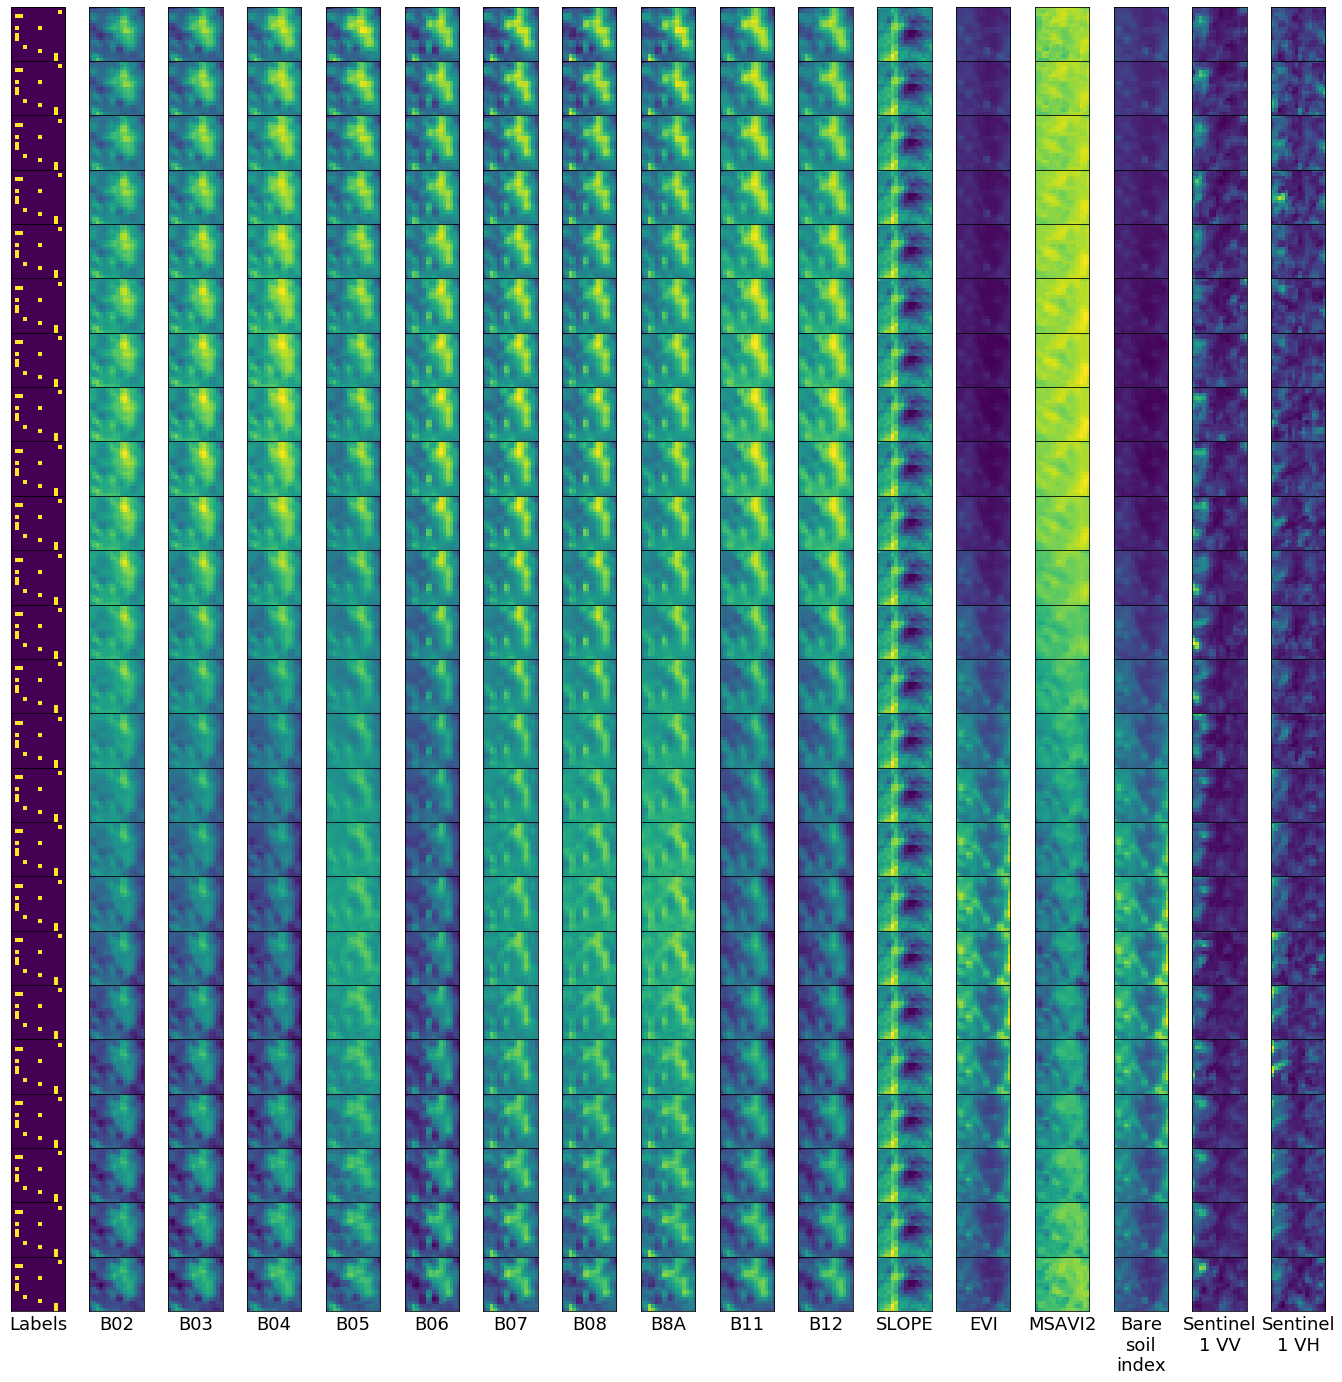

In [458]:
band_names = ['B02',"B03",'B04','B05','B06','B07', 'B08', 'B8A','B11','B12', 
              'SLOPE','EVI', 'MSAVI2', 'Bare\nsoil\nindex', 'Sentinel\n1 VV', 'Sentinel\n1 VH']

plt.figure(figsize=(24,24))
gs1 = gridspec.GridSpec(24, 17)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 

i = 0
for t in range(24):
    for b in range(17):
        plt.subplot(gs1[i])
        plt.axis('on')
        plt.xticks([])
        plt.yticks([])
        if b == 0:
#             plt.imshow(np.flip(np.multiply(train_data[plotnum,t,:,:,0:3], 255).reshape(16,16,3).astype(int),2))
            plt.imshow(train_labels_og[plotnum,:,:])
            if t == 23:
                plt.xlabel("Labels", fontsize=18)
        else:
            plt.imshow(train_data2[plotnum,t,:,:,b-1], vmin=np.min(train_data2[plotnum,:,:,:,b-1]), vmax=np.max(train_data2[plotnum,:,:,:,b-1]))
            if t == 23:
                plt.xlabel(band_names[b-1], fontsize=18)
        i += 1
plt.savefig("fig1.png", dpi=300)
plt.show()

In [404]:
train_data2[plotnum,1,0:2,0:2,0]

array([[0.07106029, 0.07303536],
       [0.09024706, 0.08964833]], dtype=float32)

In [405]:
train_data2[plotnum,0,0:2,0:2,0]

array([[0.06219437, 0.06495465],
       [0.08413012, 0.0838208 ]], dtype=float32)

In [406]:
train_data2[plotnum,1,0:2,0:2,0] - train_data2[plotnum,0,0:2,0:2,0]

array([[0.00886593, 0.00808071],
       [0.00611693, 0.00582753]], dtype=float32)

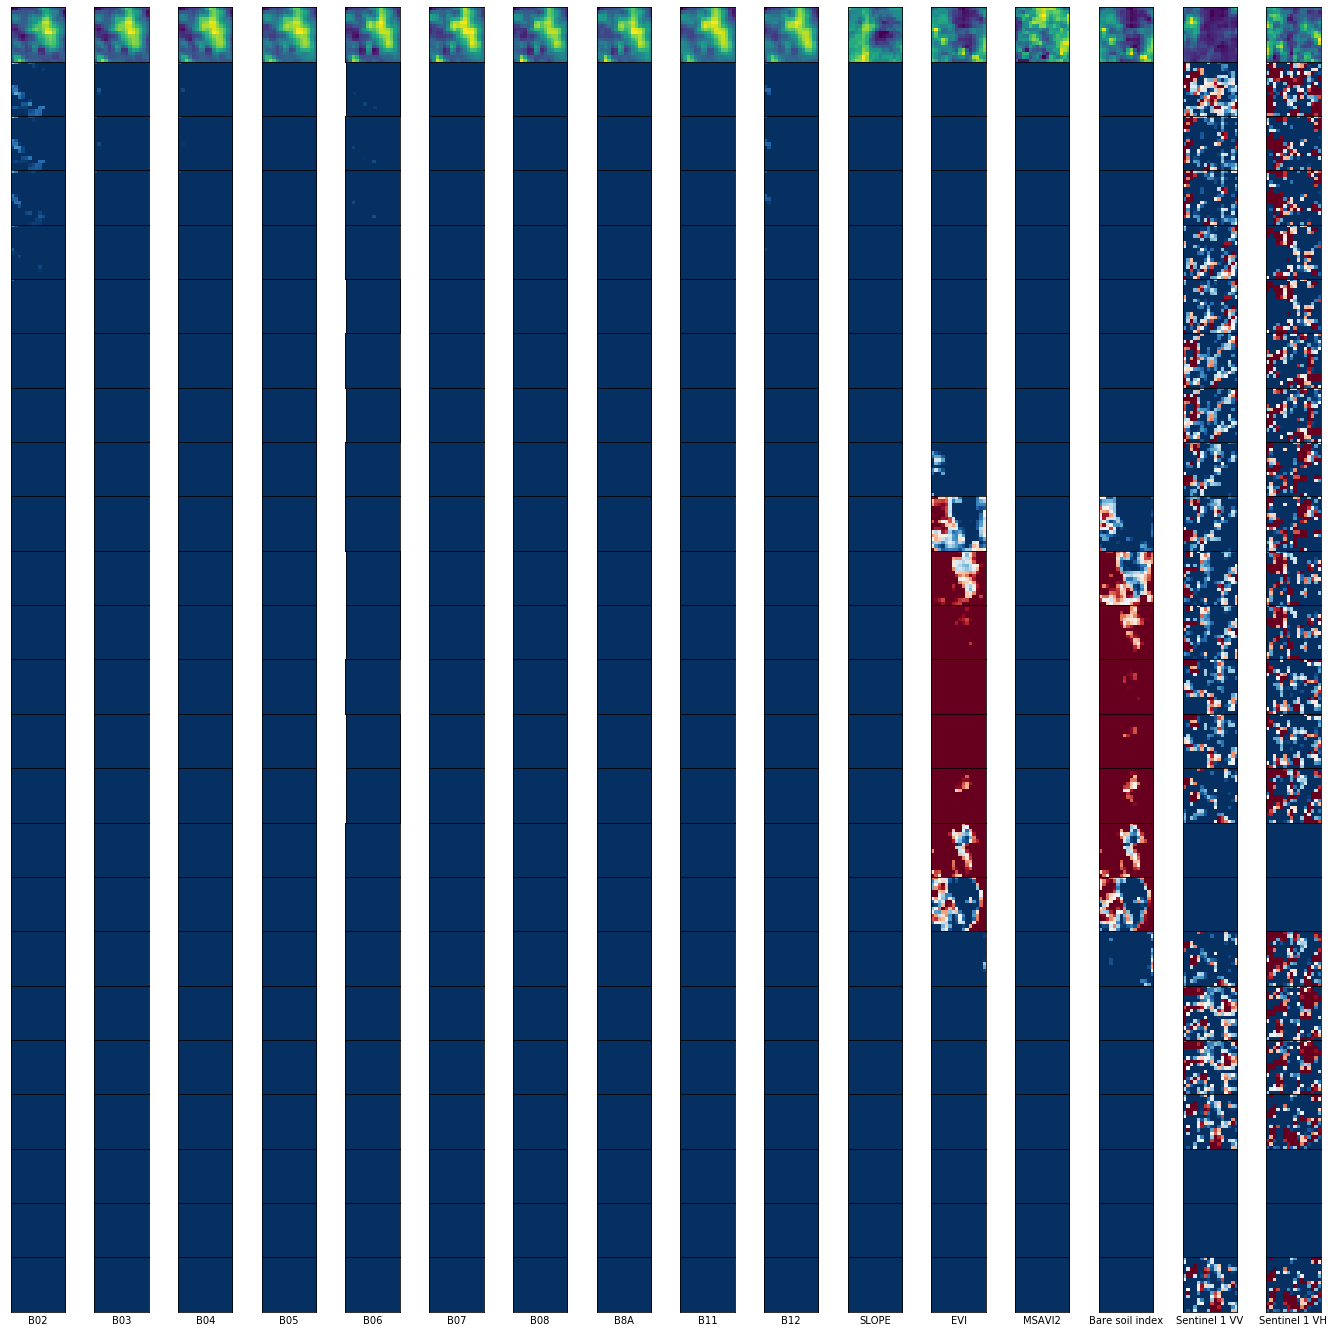

In [412]:
band_names = ['B02',"B03",'B04','B05','B06','B07', 'B08', 'B8A','B11','B12', 
              'SLOPE','EVI', 'MSAVI2', 'Bare soil index', 'Sentinel 1 VV', 'Sentinel 1 VH']

plt.figure(figsize=(24,24))
gs1 = gridspec.GridSpec(24, 16)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 

i = 0
for t in range(24):
    for b in range(16):
        plt.subplot(gs1[i])
        plt.axis('on')
        plt.xticks([])
        plt.yticks([])
        if t == 0: 
            plt.imshow(train_data2[plotnum,t,:,:,b], vmin=np.min(train_data2[plotnum,0,:,:,b]), vmax=np.max(train_data2[plotnum,0,:,:,b]))
        else: 
            plt.imshow(train_data2[plotnum,t,:,:,b] - train_data2[plotnum,t-1,:,:,b], cmap='RdBu_r', vmin=np.min(train_data2[plotnum,0,:,:,b]), vmax=np.max(train_data2[plotnum,0,:,:,b]))
        if t == 23:
            plt.xlabel(band_names[b])
        i += 1
plt.show()

**Visualizing the classification**

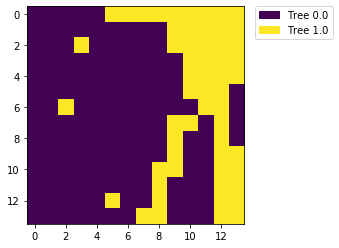

In [171]:
import matplotlib.patches as mpatches

im = plt.imshow(test_label[0])
values = np.unique(test_label[0].ravel())
colors = [ im.cmap(im.norm(value)) for value in values]
patches = [ mpatches.Patch(color=colors[i], label="Tree {l}".format(l=values[i]) ) for i in range(len(values)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

